In [19]:
import json
import os
from pprint import pprint
import requests
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

'''
This sample makes a call to the Bing Image Search API with a text query and returns relevant images with data.
Documentation: https: // docs.microsoft.com/en-us/azure/cognitive-services/bing-web-search/
'''

# Add your Bing Search V7 subscription key and endpoint to your environment variables.
subscriptionKey = "0c21c1c15d764a7dbb40f8127412f847"
endpoint = "https://api.bing.microsoft.com" + "/v7.0/images/search"

# Query to search for
query = "tomato stem rot"

# Construct a request
mkt = 'en-US'
params = {'q': query, 'mkt': mkt, 'count':150}
headers = {'Ocp-Apim-Subscription-Key': subscriptionKey}

# Call the API
try:
    response = requests.get(endpoint, headers=headers, params=params)
    response.raise_for_status()

    print("\nHeaders:\n")
    print(response.headers)

    print("\nJSON Response:\n")
    pprint(response.json())
except Exception as ex:
    raise ex


Headers:

{'Cache-Control': 'no-cache, no-store, must-revalidate', 'Pragma': 'no-cache', 'Content-Length': '260610', 'Content-Type': 'application/json; charset=utf-8', 'Expires': '-1', 'P3P': 'CP="NON UNI COM NAV STA LOC CURa DEVa PSAa PSDa OUR IND"', 'BingAPIs-TraceId': '30F1E11146F14CC08BA1A6AC34515F21', 'X-MSEdge-ClientID': '0FC79400499C6D3716999BDA48616C65', 'X-MSAPI-UserState': 'f316', 'X-Search-ResponseInfo': 'InternalResponseTime=302,MSDatacenter=BN2B', 'X-MSEdge-Ref': 'Ref A: 30F1E11146F14CC08BA1A6AC34515F21 Ref B: BLUEDGE1013 Ref C: 2021-02-10T03:05:11Z', 'apim-request-id': '1bc39466-6a39-4951-bfc6-db4d45eb84f3', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'x-content-type-options': 'nosniff', 'CSP-Billing-Usage': 'CognitiveServices.BingSearchV7.Transaction=1', 'Date': 'Wed, 10 Feb 2021 03:05:11 GMT'}

JSON Response:

{'_type': 'Images',
 'currentOffset': 0,
 'instrumentation': {'_type': 'ResponseInstrumentation'},
 'nextOffset': 180,
 'pivotSu

            'imageId': 'E93080FCEB0480B2DBF6B019B023E1341BB38799',
            'imageInsightsToken': 'ccid_RGpY4kq9*cp_07FB46D4C125D91423EBB78BFCF4E921*mid_E93080FCEB0480B2DBF6B019B023E1341BB38799*simid_608038383337341699*thid_OIP.RGpY4kq9e0-Ke4Pa2xCvygHaKZ',
            'insightsMetadata': {'availableSizesCount': 2,
                                 'pagesIncludingCount': 3,
                                 'recipeSourcesCount': 0},
            'isFamilyFriendly': True,
            'name': 'Tomato Root Rot - Northern Homestead',
            'thumbnail': {'height': 665, 'width': 474},
            'thumbnailUrl': 'https://tse2.mm.bing.net/th?id=OIP.RGpY4kq9e0-Ke4Pa2xCvygHaKZ&pid=Api',
            'webSearchUrl': 'https://www.bing.com/images/search?view=detailv2&FORM=OIIRPO&q=tomato+stem+rot&id=E93080FCEB0480B2DBF6B019B023E1341BB38799&simid=608038383337341699',
            'width': 570},
           {'accentColor': '1F3418',
            'contentSize': '650796 B',
            'contentUrl': 

                                 'recipeSourcesCount': 0},
            'isFamilyFriendly': True,
            'name': 'Tomato Blossom End Rot: How To Stop Tomato Blossom Rot',
            'thumbnail': {'height': 316, 'width': 474},
            'thumbnailUrl': 'https://tse4.mm.bing.net/th?id=OIP.F5XjGIQ3JBsMZJ8Zc3mLPwHaE8&pid=Api',
            'webSearchUrl': 'https://www.bing.com/images/search?view=detailv2&FORM=OIIRPO&q=tomato+stem+rot&id=2D4A049CC4FB68A5B78E739FBA2EE93AD50D9BA5&simid=607990275362849011',
            'width': 1024},
           {'accentColor': 'AE871D',
            'contentSize': '37683 B',
            'contentUrl': 'http://www.theunconventionaltomato.com/wp-content/uploads/2015/05/fusarium_tomato_stem-e1456025554516.jpg',
            'datePublished': '2019-12-28T05:31:00.0000000Z',
            'encodingFormat': 'jpeg',
            'height': 300,
            'hostPageDiscoveredDate': '2016-03-28T00:00:00.0000000Z',
            'hostPageDisplayUrl': 'www.theunconventiona

            'contentUrl': 'http://www.missouribotanicalgarden.org/Portals/0/Gardening/Gardening%20Help/images/Pests/Blossom_End_Rot_of_Tomato1478.jpg',
            'datePublished': '2020-07-16T13:35:00.0000000Z',
            'encodingFormat': 'jpeg',
            'height': 600,
            'hostPageDiscoveredDate': '2014-01-04T00:00:00.0000000Z',
            'hostPageDisplayUrl': 'https://www.missouribotanicalgarden.org/gardens-gardening/your-garden/help-for-the-home...',
            'hostPageDomainFriendlyName': 'Missouri Botanical Garden',
            'hostPageFavIconUrl': 'https://www.bing.com/th?id=ODF.f9ESgykFdmhN9NUoN22LuQ&pid=Api',
            'hostPageUrl': 'https://www.missouribotanicalgarden.org/gardens-gardening/your-garden/help-for-the-home-gardener/advice-tips-resources/pests-and-problems/environmental/blossom-end-rot/blossom-end-rot-of-tomato-and-pepper.aspx',
            'imageId': 'A9D5E5EDC11C4AE32846CD6D70518627E7CD47AD',
            'imageInsightsToken': 'ccid_QmY/OhP

In [10]:
search_results = response.json()
thumbnail_urls = [img["thumbnailUrl"] for img in search_results["value"]]

In [25]:
i = 0
for t in thumbnail_urls:
    image_data = requests.get(t)
    image_data.raise_for_status()
    image = Image.open(BytesIO(image_data.content))        
    image.save(f'capstone/data/web/{i}.png')
    i += 1

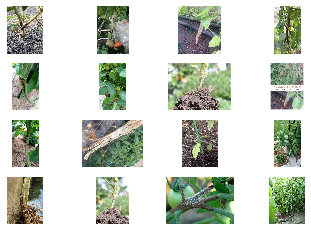

<Figure size 1440x1440 with 0 Axes>

In [16]:
f, axes = plt.subplots(4, 4)
plt.figure(figsize=(20, 20))
for i in range(4):
    for j in range(4):
        image_data = requests.get(thumbnail_urls[i+4*j])
        image_data.raise_for_status()
        image = Image.open(BytesIO(image_data.content))        
        axes[i][j].imshow(image)
        axes[i][j].axis("off")
plt.show()

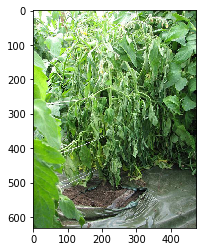

In [17]:
plt.imshow(image)